### Задание 
Ряды событий. Дан временной ряд ежедневных наблюдений за числом некоторых событий, происходящих на определенном объекте. Проведите разведочный анализ статистики этого ряда, постройте необходимые модели, и выполните прогноз числа событий в последующие 1, 3 и 10 дней. Обоснуйте точность Ваших прогнозов. Опишите Ваше решение, и приложите, пожалуйста, тексты программ. Если были использованы внешние компоненты и библиотеки, то укажите их. Предпочтителен язык Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller # тест Дики-Фуллера
from statsmodels.graphics.tsaplots import plot_acf # для построения автокорреляции 
from statsmodels.tsa.arima.model import ARIMA # для построения модели

In [2]:
numbers = pd.read_csv('C:/Users/admin/Desktop/Доп/Подача заявок на работу/ЦДУ ТЭК от МинЭнерго/task1.txt')

### Разведочный анализ данных

In [3]:
numbers.head(10)

,1
0,2
1,4
2,2
3,2
4,4
5,1
6,2
7,1
8,0
9,1


In [4]:
# общая инф-я о массиве
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       999 non-null    int64
dtypes: int64(1)
memory usage: 7.9 KB


In [5]:
# поиск пропусков
numbers['1'].isna().sum()

0

In [6]:
# максимальное и минимальное значение массива
print('Минимальное значение массива: {0}; максимальное: {1}'.format(numbers['1'].min(), numbers['1'].max()))

Минимальное значение массива: 0; максимальное: 6


In [7]:
# стандартное отклонение
np.std(numbers['1'])

1.0907732958683836

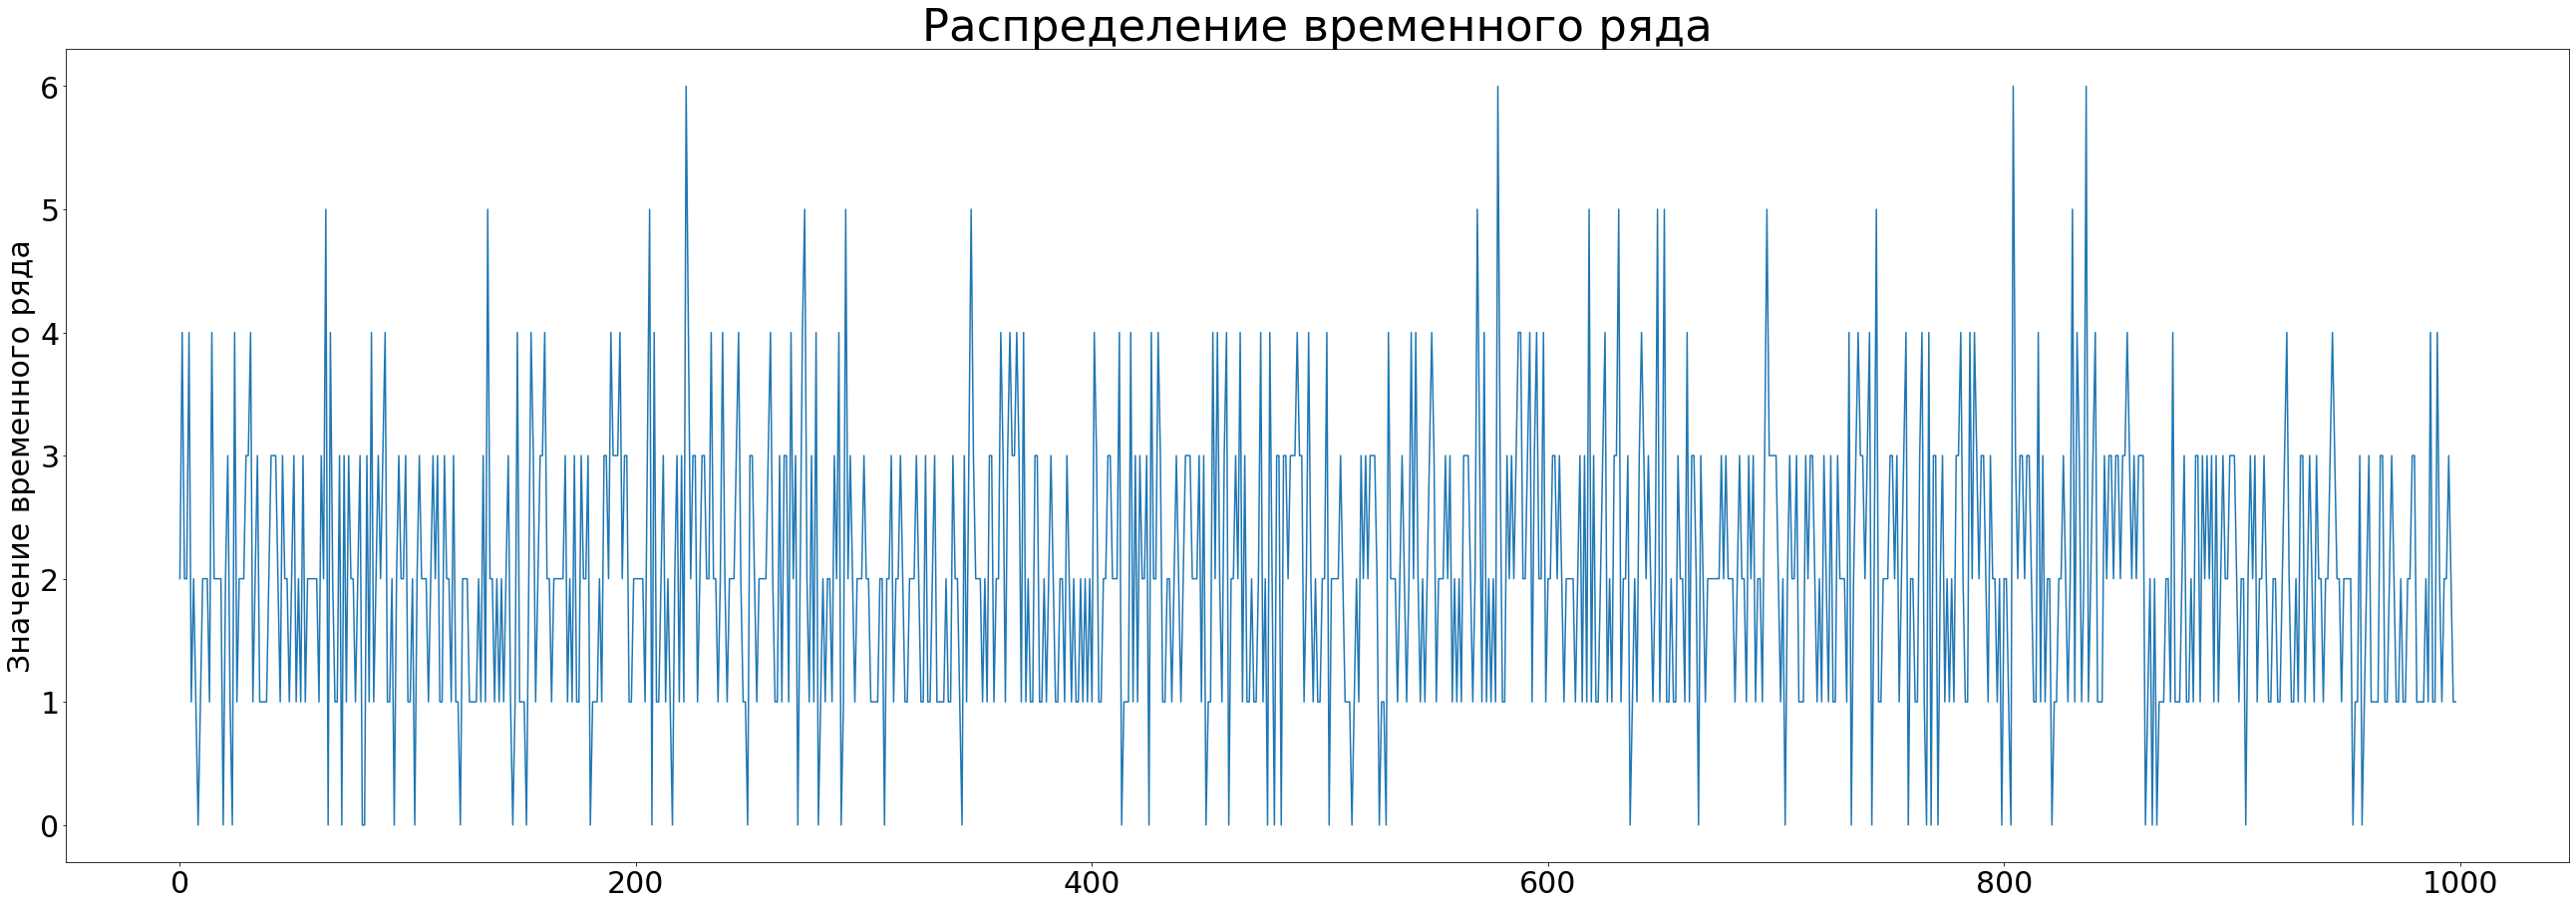

In [8]:
plt.figure(figsize=(45,15))
plt.plot(numbers)
plt.title('Распределение временного ряда', fontsize = 45)
plt.ylabel('Значение временного ряда', fontsize = 30)
plt.tick_params (axis = 'both', which = 'major', labelsize = 30 )
plt.show()

- по распределению временного ряда не видно ни тренда, ни периодичности, ни сезонности 

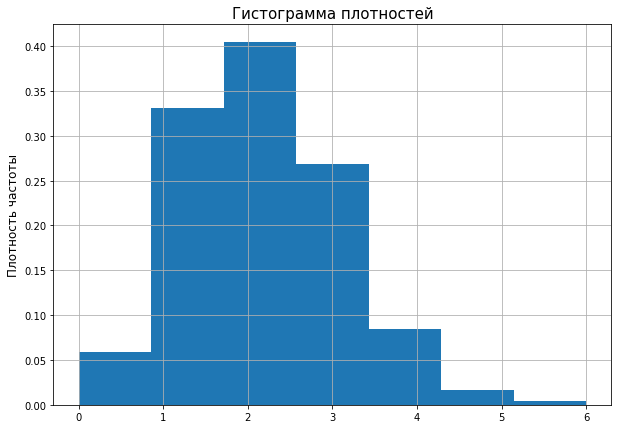

In [9]:
# гистограмма плотностей
plt.figure(figsize=(10,7))
numbers['1'].hist(density=True, bins=7)
plt.title('Гистограмма плотностей', fontsize = 15)
plt.ylabel('Плотность частоты', fontsize = 12)
plt.show()

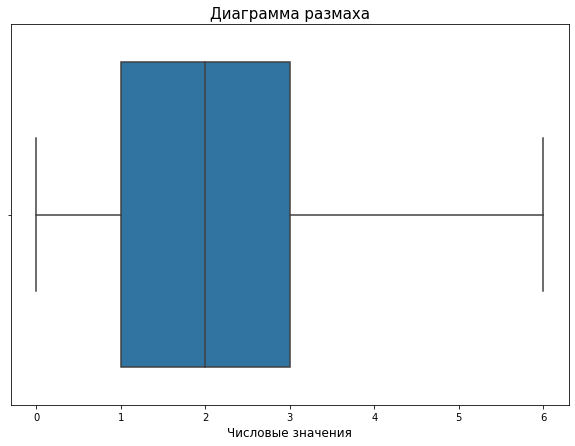

In [10]:
# диаграмма размаха
plt.figure(figsize=(10,7))
sns.boxplot(x='1', data=numbers)
plt.title('Диаграмма размаха', fontsize = 15)
plt.xlabel('Числовые значения', fontsize = 12)
plt.show()

- по гисторгамме плотностей и диаграмме размаха видно, что основная часть значений лежит от 1 до 3  

### Построение модели

**Проверим данные на стационарность с помощью теста Дики-Фуллера**

- Нулевая гипотеза предполагает, что процесс нестационарный
- Альтернативная гипотеза - процесс стационарный

In [11]:
# возьмем p-value = 5%
adf_test = adfuller(numbers['1'])
 
# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 2.0033250799228824e-22


- полученный p-value меньше заданного значения. Исходя из этого, отвергаем нулевую гипотезу. 

**Наш временной ряд стационарен, нет необходимости его дифференцировать. Исходя из этого можно применить модель ARMA.**

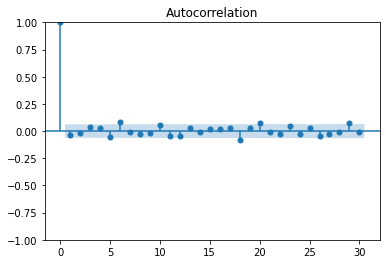

In [12]:
# построение автокорреляционной функции
plot_acf(numbers)
plt.show()

- по графику видна слабая корреляционная зависимость.

**Разделение данных на обучающую и тестовую группу, для проверки работоспособности модели**

In [13]:
# обучающая выборка будет включать данные до 900 дней 
train = numbers[:900]
 
# тестовая выборка начинается с 900 дня
test = numbers[900:]

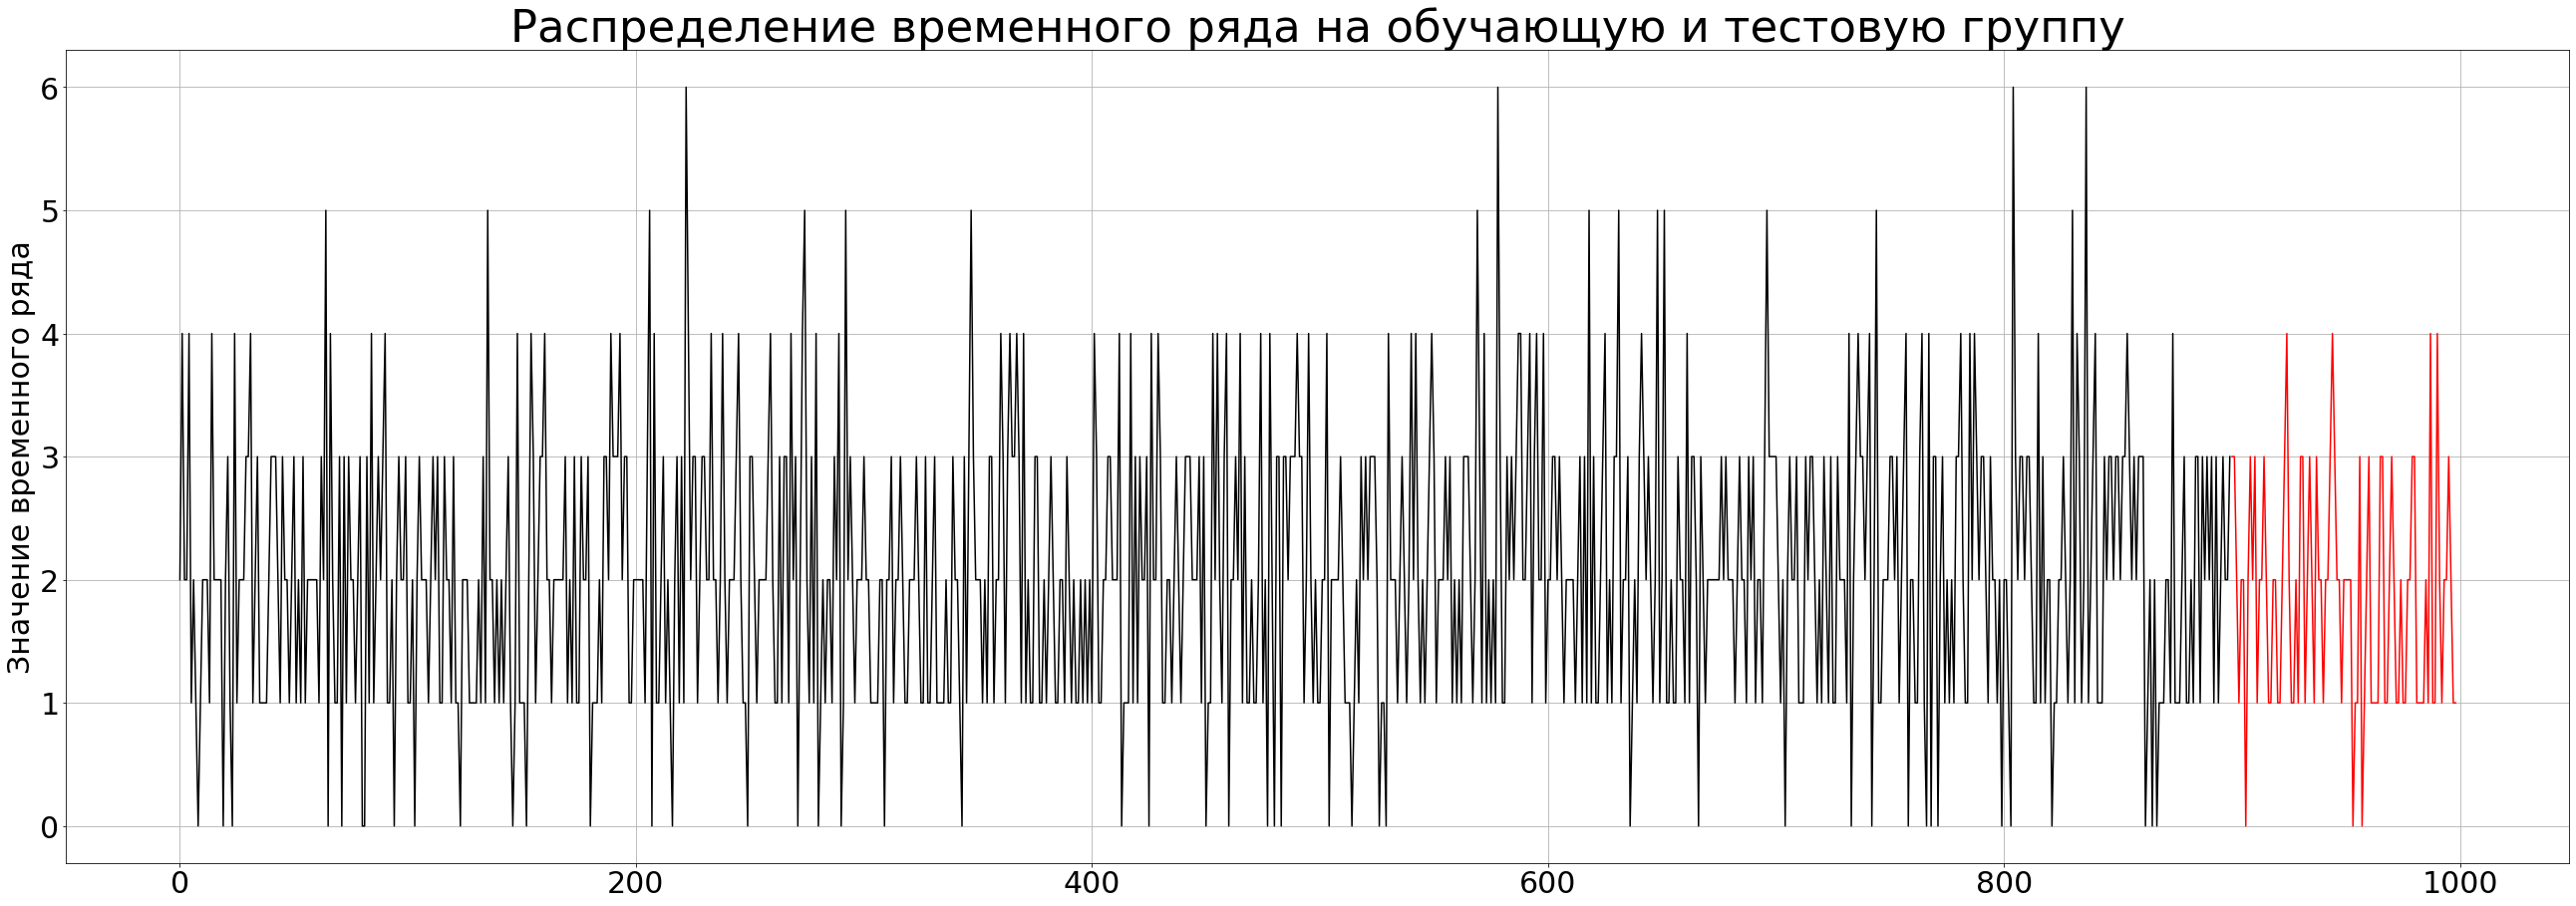

In [14]:
plt.figure(figsize=(45,15))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
 
# заголовок и подписи к осям
plt.title('Распределение временного ряда на обучающую и тестовую группу', fontsize = 45)
plt.ylabel('Значение временного ряда', fontsize = 30)
plt.tick_params (axis = 'both', which = 'major', labelsize = 30)
# добавим сетку
plt.grid()
 
plt.show()

In [15]:
# создаем объект импортируемой модели
model = ARIMA(train, order=(1, 1, 0))
 
# применим метод fit
result = model.fit()

In [16]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
 
# и закончится в конце тестового
end = len(train) + len(test) - 1
  
# применим метод predict
predictions = result.predict(start, end)
predictions

900    2.480271
901    2.750389
902    2.610001
903    2.682965
904    2.645043
         ...   
994    2.658012
995    2.658012
996    2.658012
997    2.658012
998    2.658012
Name: predicted_mean, Length: 99, dtype: float64

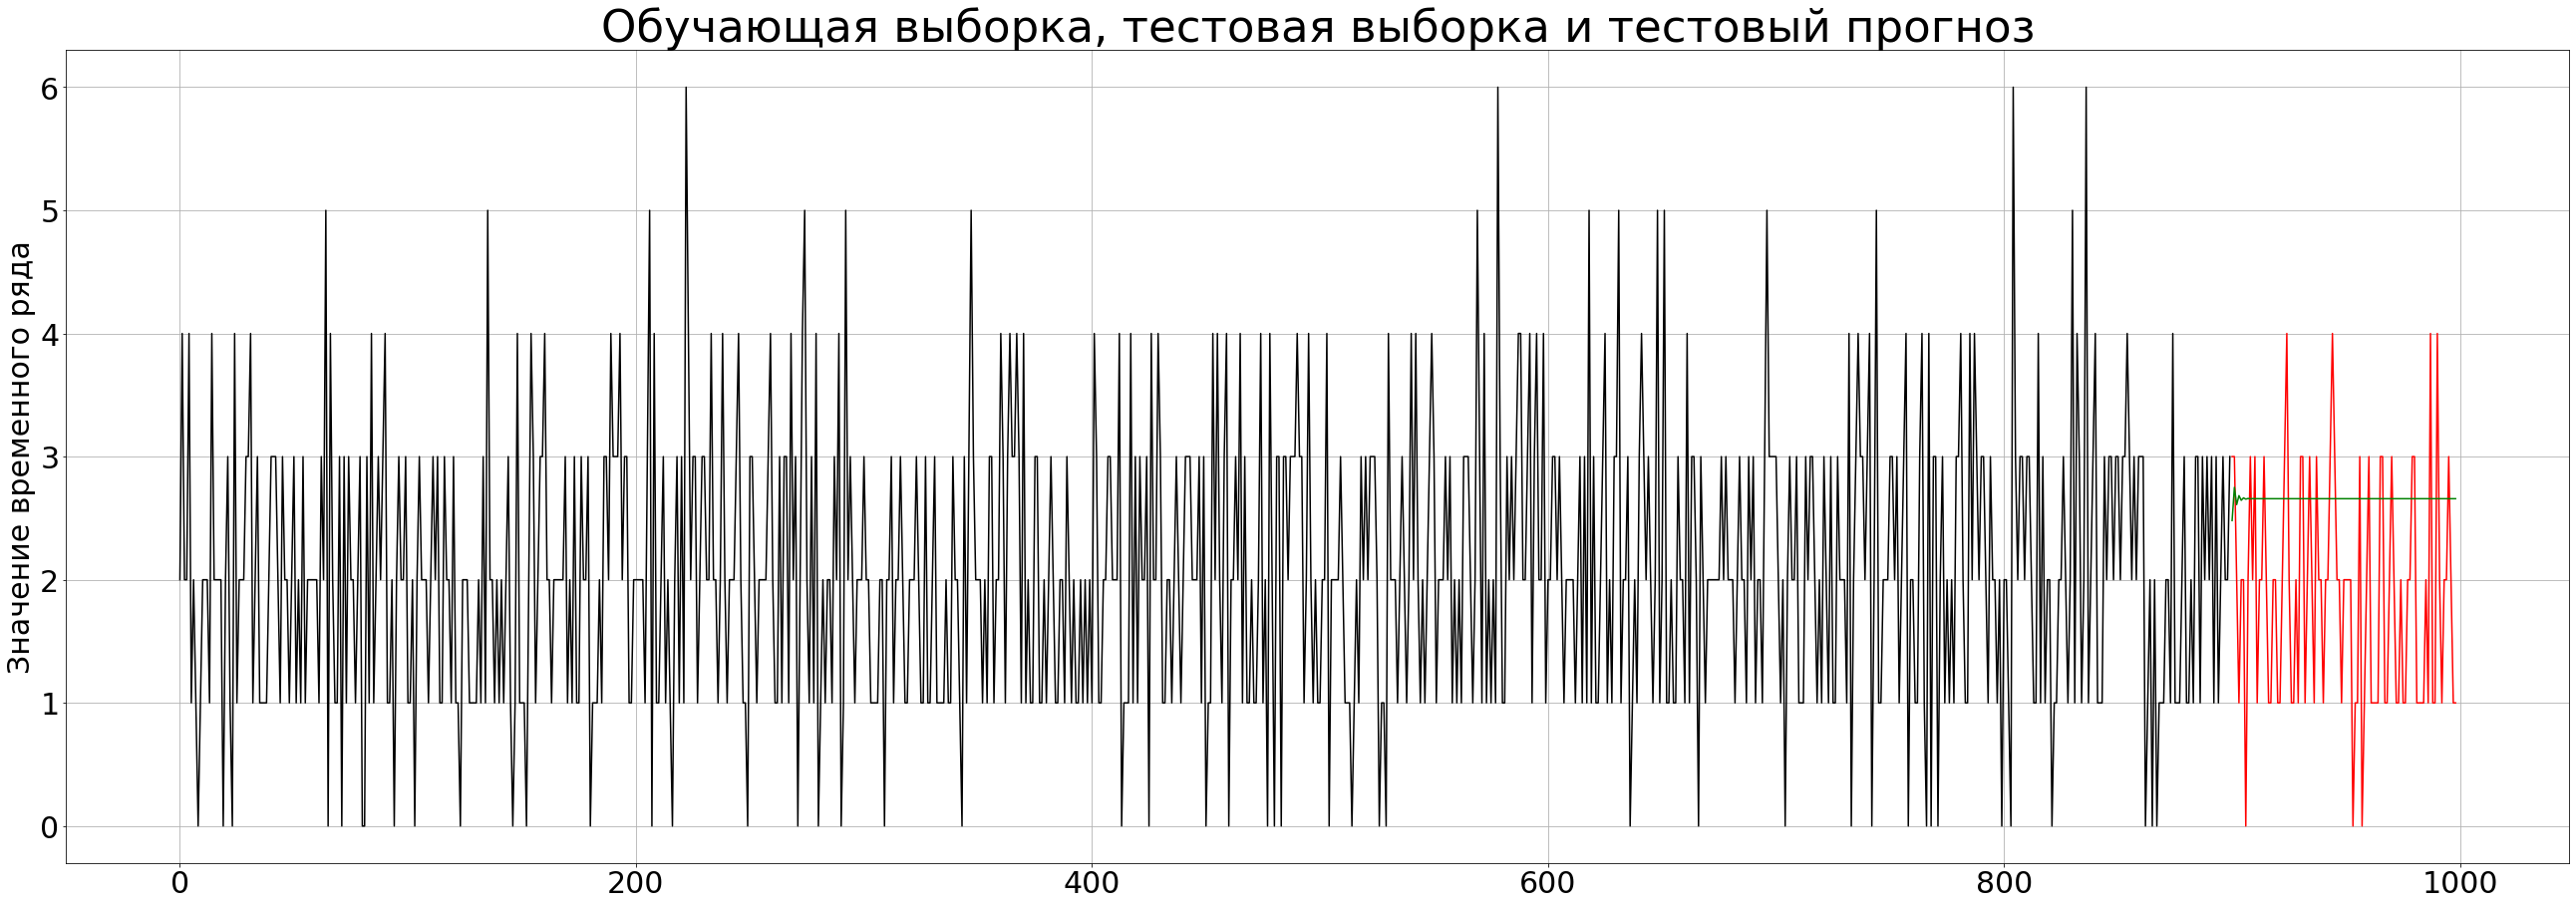

In [17]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.figure(figsize=(45,15))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз', fontsize = 45)
plt.ylabel('Значение временного ряда', fontsize = 30)
plt.tick_params (axis = 'both', which = 'major', labelsize = 30)
 
# добавим сетку
plt.grid()
 
plt.show()

- не смог определить параметры p и q. Возможно, из-за этого тестовая выборка и тестовый прогноз не совпадают.